# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on two variational parameters, $\sigma$, which is the width of the two Gaussians under square root, and $\mu$, which represents the distance from the origin of their average values.
<br><br>

### <font face = "Tahoma" style="color:teal">Supplementary material</font>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import decimal
import pylab as pl
from decimal import *

In [2]:
mu=0.81
sigma=0.65
hbar = 1
m = 1
a = 6
N = 100 # number of iterations
x = np.linspace(-a/2, a/2, N)

In [3]:
def Vpot(x):
    return (x**2 - 2.5)*x**2

def Psi_0(x):
    return (np.e**(-1*(x-mu)**2/(2*sigma*sigma))+np.e**(-1*(x+mu)**2/(2*sigma*sigma)))
f_0 = Psi_0(x)

Ground state energy:  -0.4608785042700637
1st excited state energy:  0.09618379208055453
2nd excited state energy:  1.9675978597156274


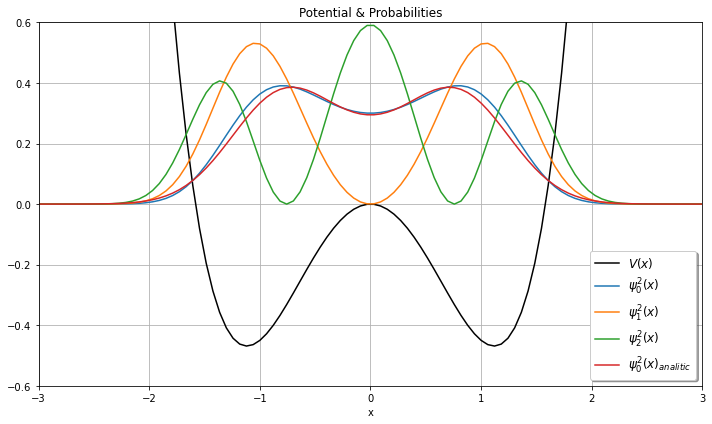

In [4]:
# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2
CDiff = np.diag(np.ones(N-1),-1) - 2 * np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1) # -2  1  0 ... 0  0  0
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array                    1 -2  1 ... 0  0  0
# The default is k=0. Use k>0 for diagonals above the main diagonal,                      0  1 -2 ... 0  0  0
# and k<0 for diagonals below the main diagonal                                           ...
#                                                                                         0  0  0 ...-2  1  0
#                                                                                         0  0  0 ... 1 -2  0
#                                                                                         0  0  0 ... 0  1 -2

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)       # linalg = does implementations of standard linear algebra algorithms.
                                # eigh = Return the eigenvalues and eigenvectors of a complex Hermitian 
                                # (conjugate symmetric) or a real symmetric matrix.

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])


# Plot a few things
fig, ax = plt.subplots(figsize=(10,6),tight_layout=True)
scale = 0.3
plt.plot(x, scale*V, color="Black", label="$V(x)$") # plot the potential
plt.plot(x,(psi[0])**2,label='$\psi_0^2(x)$')
plt.plot(x,(psi[1])**2,label='$\psi_1^2(x)$')
plt.plot(x,(psi[2])**2,label='$\psi_2^2(x)$')
plt.plot(x,0.348*f_0*f_0,label='$\psi_0^2(x)_{analitic}$')
plt.title("Potential & Probabilities")
plt.xlabel("x")
legend = ax.legend(loc='lower right', shadow=True, prop={'size': 12}, fontsize='x-large')
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

<br>

### <font face = "Tahoma" style="color:teal">Funzioni</font>

In [5]:
# graphic with error bar
def graphic_err(y,errore,xstring,ystring):
    n=len(y)
    x=np.arange(n)
    
    plt.figure(figsize=(10,5),tight_layout=True)
    plt.errorbar(x,y,yerr=errore)
    x = [0, 100]
    y = [0,0]
    plt.plot(x,y,'k--')
    plt.title('VMC  -  $<H>_0$', color='C0', fontsize=16)
    plt.xlabel(xstring)
    plt.ylabel(ystring)
    plt.grid(alpha=0.4)
    plt.show()

In [6]:
def probabilities(x,x2):
    
    # analitic solution
    def Psi_0(x):
        return (np.e**(-1*(x-mu)**2/(2*sigma*sigma))+np.e**(-1*(x+mu)**2/(2*sigma*sigma)))
    f_0 = Psi_0(x)

    fig, ax = plt.subplots(figsize=(14,7))
    #ax.errorbar(x,p,yerr=err_p,label='sampled $\psi^2(x)$', color='lightblue')    #stesso risultato dell'istogramma 
    ax.plot(x,f_0**2*0.35,label='analitic $\psi^2(x)$')

    # numerical solution of p0(x)
    x1 = np.linspace(-a/2, a/2, N)
    ax.plot(x1,psi[0]**2,label='numerical $\psi^2(x)$')

    ax.hist(x2,100,range=[-5,5],density=True, histtype='step',label='sampled configurations', stacked=True, fill=False,color='violet')
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.xlim(-5,5)
    legend = ax.legend(loc='upper right', shadow=True, prop={'size': 14}, fontsize='x-large')

    plt.grid(alpha=0.4)
    plt.show()

In [7]:
def p_comparison(x0,p0,err0,x,p,err,title):

    X = np.linspace(-a/2, a/2, N)

    fig, ax = plt.subplots(figsize=(14,7))
    ax.errorbar(x,p,yerr=err,color='purple',label='PIGS',zorder=2)
    #ax.hist(XX,100,range=[-5,5],density=True, histtype='step',label='VMC', stacked=True, fill=False,color='violet')
    ax.errorbar(x0,p0,yerr=err0, color='blue',label='VMC',zorder=1)
    ax.plot(X,psi[0]**2,color='orange',label='numerical $\psi^2(x)$',zorder=3)
    ax.set_title('\n\nProbability distribution\nComparison between VMC and PIGS with '+title+'\n\n', color='C0', fontsize=16)
    ax.set_ylabel('p(x)')
    ax.set_xlabel('x\n')
    legend = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.,fontsize='large')
    ax.grid(alpha=0.4)

    plt.show()

In [8]:
def im_time(x0,y0,err0,x1,y1,err1,x2,y2,err2,x3,y3,err3,x4,y4,err4,x5,y5,err5):

    fig, ax = plt.subplots(figsize=(20,10))
    ax.errorbar(x0,y0,yerr=err0,label='$t_{Im}=8$')
    ax.errorbar(x1,y1,yerr=err1,label='$t_{Im}=4$')
    ax.errorbar(x2,y2,yerr=err2,label='$t_{Im}=2$')
    ax.errorbar(x3,y3,yerr=err3,label='$t_{Im}=1$')
    ax.errorbar(x4,y4,yerr=err4,label='$t_{Im}=0.5$')
    ax.errorbar(x5,y5,yerr=err5,label='$t_{Im}=0.1$', color='violet')
    
    '''ax.plot(x0,y0,label='$t_{Im}=8$')
    ax.plot(x1,y1,label='$t_{Im}=4$')
    ax.plot(x2,y2,label='$t_{Im}=2$')
    ax.plot(x3,y3,label='$t_{Im}=1$')
    ax.plot(x4,y4,label='$t_{Im}=0.5$')
    ax.plot(x5,y5,label='$t_{Im}=0.1$')'''

    plt.xlabel('$x$')
    plt.ylabel('$p(x)$')
    plt.xlim(-2.5,2.5)
    plt.title('\nPIGS - Comparison between different imaginary time propagations for $\Psi_T^{\sigma,\mu}(x)$', color='C0', fontsize=18)
    legend = ax.legend(loc='upper right', shadow=True, prop={'size': 14}, fontsize='x-large')

    plt.grid(alpha=0.4)
    plt.show()

In [9]:
def temperatures(x0,y0,err0,x1,y1,err1,x2,y2,err2,x3,y3,err3,x4,y4,err4,x5,y5,err5):

    fig, ax = plt.subplots(figsize=(20,10))
    ax.errorbar(x0,y0,yerr=err0,label='T=0')
    ax.errorbar(x1,y1,yerr=err1,label='T=1.25')
    ax.errorbar(x2,y2,yerr=err2,label='T=2.5')
    ax.errorbar(x3,y3,yerr=err3,label='T=5')
    ax.errorbar(x4,y4,yerr=err4,label='T=7.5')
    ax.errorbar(x5,y5,yerr=err5,label='T=10')

    plt.xlabel('$x$')
    plt.ylabel('$p(x)$')
    plt.xlim(-5,5)
    plt.title('\nComparison between PIMC at different temperatures and PIGS', color='C0', fontsize=18)
    legend = ax.legend(loc='upper right', shadow=True, prop={'size': 14}, fontsize='x-large')

    plt.grid(alpha=0.4)
    plt.show()

<br>

### <b>Exercise 08.1</b>

Write a C++ Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample a trial wave function $|\Psi_T(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$ (Suggestion: as a starting point, you can use the code you have already developed for the Hydrogen atom or the Monte Carlo NVT code). Using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity.
<br><br>

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Il codice che svolge il Variational Monte Carlo è situato nella cartella <i>/Lecture08/MC_Variational</i>.
    </p>
    
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Esso campiona la densità di probabilità $p(x) = |\Psi_T(x)|^2$ e calcola $\langle {\hat H} \rangle_T$, a parametri $\mu$ e $\sigma$ fissati. Utilizzando il metodo a blocchi, la stima dell'integrale è data da <br><br>
    $$
    \langle {\hat H} \rangle_T = 
    \frac{1}{N_{blocks}} \sum_{i=1}^{N_{blocks}} \left(\frac{1}{L}\sum_{i=1}^{L} \frac{{\hat H} \Psi_T(x_i)}{\Psi_T(x_i)} \right) =: 
    \frac{1}{N_{blocks}} \sum_{i=1}^{N_{blocks}} \left(\frac{1}{L}\sum_{i=1}^{L} E_{loc,T}(x)\right),
    $$
    <br>
    dove $N_{blocks}$ è il numero di blocchi della simulazione e 
    <br>
    $$ 
    {\hat H} \Psi_T(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi_T(x) = E_T \Psi_T(x).
    $$
    </p>
    
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Ho implementato la possibilità di ottenere l'istogramma di $p(x) = |\Psi_T(x)|^2$, stampando in un file tutte le $x$ campionate. Inoltre ho implementato la possibilità di ottenere il valore finale $|\Psi_T(x)|^2$ tramite il data blocking, con le relative incertezze (in modo analogo alla $g(x)$ della Lezione $07$).
    </p>

### <b>Exercise 08.2</b>

Use your Variational Monte Carlo code to find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$:

$$
\langle {\hat H} \rangle_T = \frac{\langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}
{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$ <br>


- As usual, <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below).
<br><br>

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Ho fatto una serie di simulazioni usando il codice implementato per l'<i>Esercizio 08.1</i>, cambiando manualmente ogni volta i valori dei parametri. Così facendo ho ottenuto una stima di $E_0=-0.460236  \pm  0.00136802$ per <b>$\mu=0.81$</b> e <b>$\sigma=0.65$</b>.
    </p>
    
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Riporto qui di seguito il grafico della stima di $\langle {\hat H} \rangle_T$ e della sua incertezza in funzione del numero di blocchi della simulazione, per i parametri che la minimizzano.
    <br>
    Riporto anche il grafico della $|\Psi_T(x)|^2$ riempiendo l'istogramma con le configurazioni campionate e lo confronto con con la curva analitica e con il grafico della soluzione numerica.
    </p>

### <font face = "Tahoma" style="color:teal"><b>Stima di $<\hat{H}>_T$</b></font>

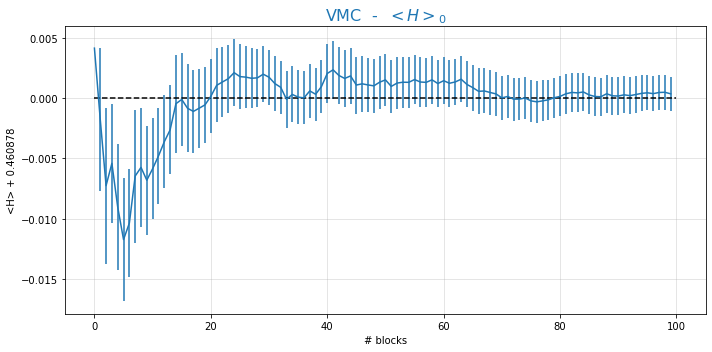

<H> =  -0.460522  +/-  0.00141994 



In [10]:
ene = np.loadtxt(fname='Lecture08/Esercizio2/output.ene.dat',usecols=2)
error_ene = np.loadtxt(fname='Lecture08/Esercizio2/output.ene.dat',usecols=3)
graphic_err(ene+0.460878,error_ene,'# blocks','<H> + 0.460878')
print('<H> = ',ene[N-1],' +/- ',error_ene[N-1],'\n')

### <font face = "Tahoma" style="color:teal"><b>$|\Psi(x)|^2$ campionata e confronti</b></font>

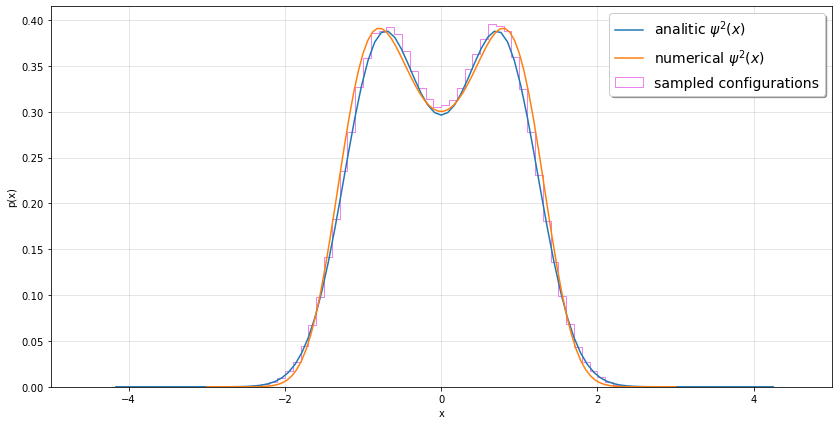

In [11]:
# p(x) with statistical uncertainties
x = np.loadtxt(fname='Lecture08/Esercizio2/output.pave.0',usecols=0)
pofx = np.loadtxt(fname='Lecture08/Esercizio2/output.pave.0',usecols=1)
err_pofx = np.loadtxt(fname='Lecture08/Esercizio2/output.pave.0',usecols=2)

#for the histogram of p(x)
x_ = np.loadtxt(fname='Lecture08/Esercizio2/output.x.dat',usecols=0)

probabilities(x,x_)

### <b>Exercise 08.3</b>

Use the PIMC/PIGS code we have provided to study the same 1D quantum system. Use the PIGS algorithm ($T=0$) to project
- a constant trial wave function, $\Psi_T(x)=1$
- using $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ with the variational parameters you have optimized.

<span style="color:red">Compare your results with those obtained with your VMC code</span>. By using $\Psi_T^{\sigma,\mu}(x)$, how much can you reduce the imaginary time propagation with respect to the first case?

<span style="color:red">Finally, use the PIMC algorithm ($T>0$) to observe how the histogram with the sampled configurations changes by increasing the temperature.</span><br>

### <font face = "Tahoma" style="color:teal"><b>PIGS:   $T=0$</b></font>

In [12]:
x_p1 = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_psi1/out.probability.dat',usecols=0)
prob1 = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_psi1/out.probability.dat',usecols=1)
err_prob1 = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_psi1/out.probability.dat',usecols=2)

x_p = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_psi/out.probability.dat',usecols=0)
prob = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_psi/out.probability.dat',usecols=1)
err_prob = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_psi/out.probability.dat',usecols=2)

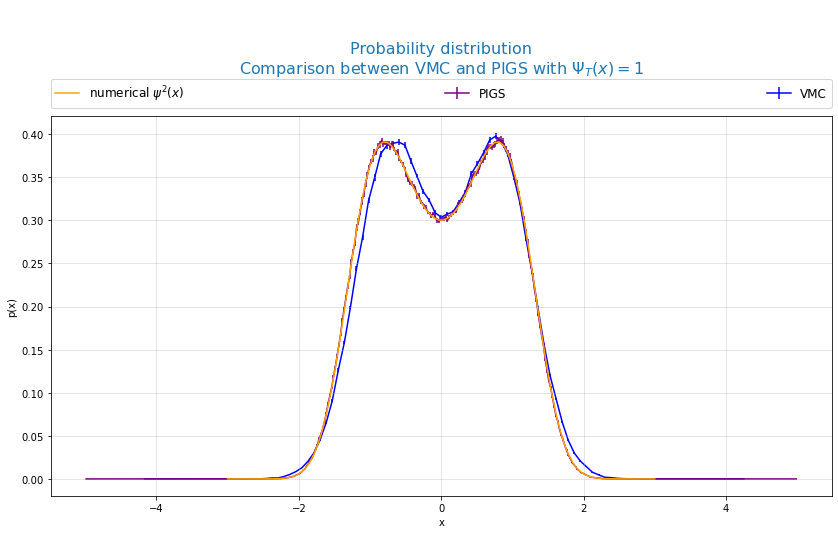

In [13]:
p_comparison(x,pofx,err_pofx,x_p1,prob1,err_prob1,'$\Psi_T(x)=1$')

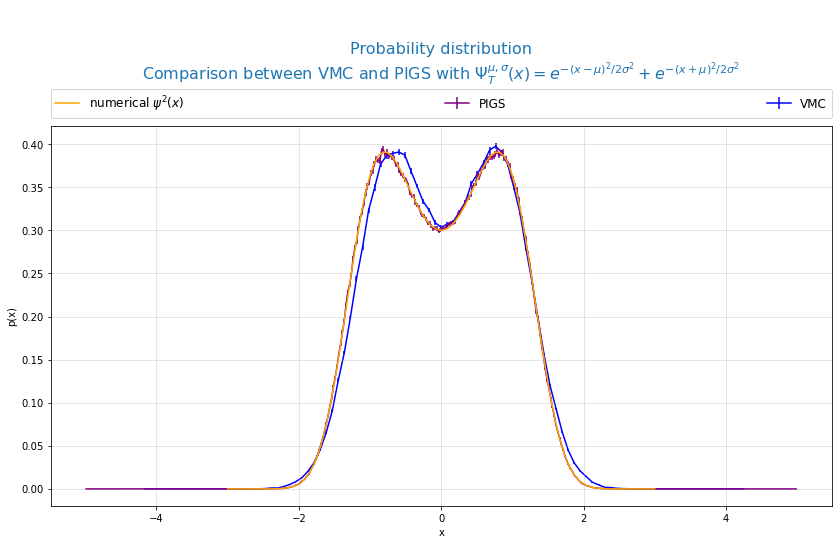

In [14]:
p_comparison(x,pofx,err_pofx,x_p,prob,err_prob,'$\Psi_T^{\mu,\sigma}(x)=e^{-(x-\mu)^2/2\sigma^2}+e^{-(x+\mu)^2/2\sigma^2}$')

### <font face = "Tahoma" style="color:teal"><b>PIGS for different imaginary time propagation</b></font>

In [15]:
x_it1 = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_it_4_/out.probability.dat',usecols=0)
p_it1 = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_it_4_/out.probability.dat',usecols=1)
err_p_it1 = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_it_4_/out.probability.dat',usecols=2)

x_it2 = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_it_2_/out.probability.dat',usecols=0)
p_it2 = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_it_2_/out.probability.dat',usecols=1)
err_p_it2 = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_it_2_/out.probability.dat',usecols=2)

x_it3 = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_it_1_/out.probability.dat',usecols=0)
p_it3 = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_it_1_/out.probability.dat',usecols=1)
err_p_it3 = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_it_1_/out.probability.dat',usecols=2)

x_it4 = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_it_0.5_/out.probability.dat',usecols=0)
p_it4 = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_it_0.5_/out.probability.dat',usecols=1)
err_p_it4 = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_it_0.5_/out.probability.dat',usecols=2)

x_it5 = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_it_0.1_/out.probability.dat',usecols=0)
p_it5 = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_it_0.1_/out.probability.dat',usecols=1)
err_p_it5 = np.loadtxt(fname='Lecture08/Esercizio3/PIGS_it_0.1_/out.probability.dat',usecols=2)

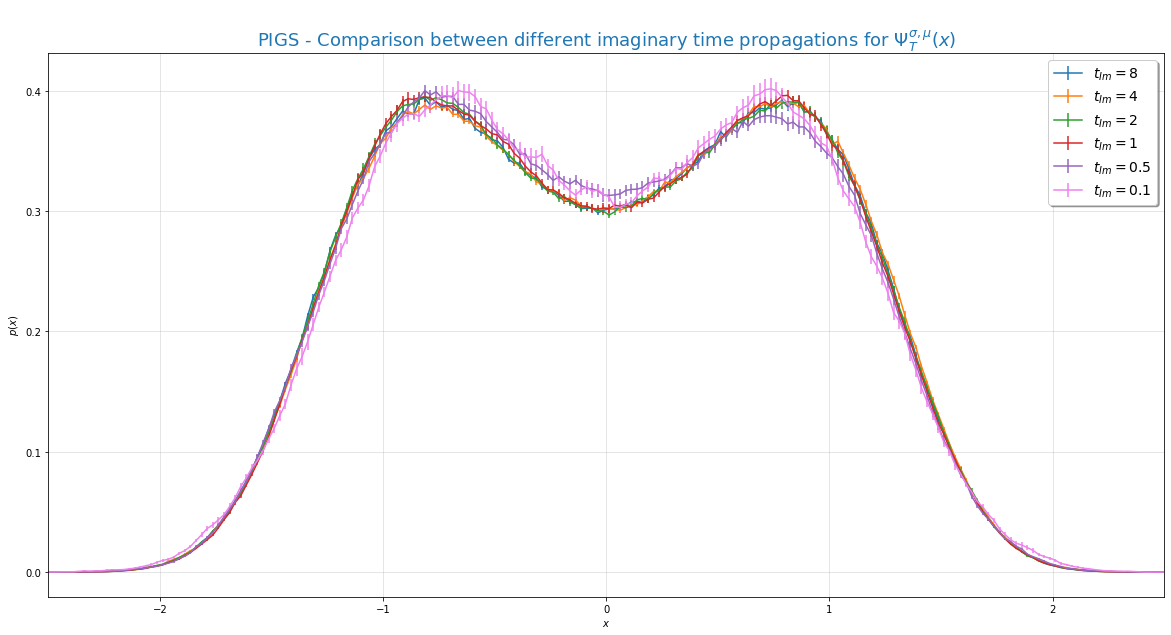

In [16]:
im_time(x_p,prob,err_prob,x_it1,p_it1,err_p_it1,x_it2,p_it2,err_p_it2,x_it3,p_it3,err_p_it3,x_it4,p_it4,err_p_it4,x_it5,p_it5,err_p_it5)

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Usando $\Psi_T^{\mu,\sigma}(x)=e^{-\frac{(x-\mu)^2}{2 \sigma^2}}+e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$, ho lanciato diverse simulazioni a $T=0$, riducendo ogni volta il tempo immaginario rispetto al primo caso. Noto che fino a un tempo immaginario uguale a $1$ il grafico della distribuzione rimane approssimativamente invariato; invece per tempi immaginari minori di $1$ il grafico inizia a cambiare.
    </p>

### <font face = "Tahoma" style="color:teal"><b>PIMC: $T>0$</b></font>

In [17]:
x_t1 = np.loadtxt(fname='Lecture08/Esercizio3/PIMC_psi__T1.25_/out.probability.dat',usecols=0)
p_t1 = np.loadtxt(fname='Lecture08/Esercizio3/PIMC_psi__T1.25_/out.probability.dat',usecols=1)
err_p_t1 = np.loadtxt(fname='Lecture08/Esercizio3/PIMC_psi__T1.25_/out.probability.dat',usecols=2)

x_t2 = np.loadtxt(fname='Lecture08/Esercizio3/PIMC_psi__T2.5_/out.probability.dat',usecols=0)
p_t2 = np.loadtxt(fname='Lecture08/Esercizio3/PIMC_psi__T2.5_/out.probability.dat',usecols=1)
err_p_t2 = np.loadtxt(fname='Lecture08/Esercizio3/PIMC_psi__T2.5_/out.probability.dat',usecols=2)

x_t3 = np.loadtxt(fname='Lecture08/Esercizio3/PIMC_psi__T5_/out.probability.dat',usecols=0)
p_t3 = np.loadtxt(fname='Lecture08/Esercizio3/PIMC_psi__T5_/out.probability.dat',usecols=1)
err_p_t3 = np.loadtxt(fname='Lecture08/Esercizio3/PIMC_psi__T5_/out.probability.dat',usecols=2)

x_t4 = np.loadtxt(fname='Lecture08/Esercizio3/PIMC_psi__T7.5_/out.probability.dat',usecols=0)
p_t4 = np.loadtxt(fname='Lecture08/Esercizio3/PIMC_psi__T7.5_/out.probability.dat',usecols=1)
err_p_t4 = np.loadtxt(fname='Lecture08/Esercizio3/PIMC_psi__T7.5_/out.probability.dat',usecols=2)

x_t5 = np.loadtxt(fname='Lecture08/Esercizio3/PIMC_psi__T10_/out.probability.dat',usecols=0)
p_t5 = np.loadtxt(fname='Lecture08/Esercizio3/PIMC_psi__T10_/out.probability.dat',usecols=1)
err_p_t5 = np.loadtxt(fname='Lecture08/Esercizio3/PIMC_psi__T10_/out.probability.dat',usecols=2)

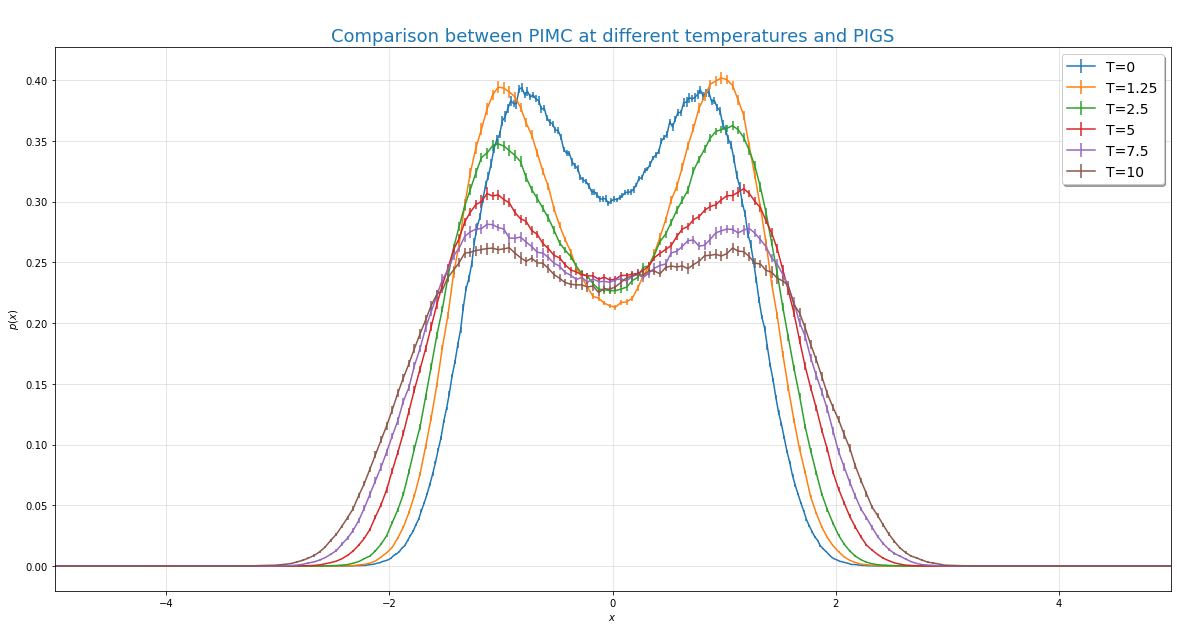

In [18]:
temperatures(x_p,prob,err_prob,x_t1,p_t1,err_p_t1,x_t2,p_t2,err_p_t2,x_t3,p_t3,err_p_t3,x_t4,p_t4,err_p_t4,x_t5,p_t5,err_p_t5)

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Lanciando una serie di simulazioni a temperature differenti, noto che la densità di probabilità cambia rispetto a $T=0$. Man mano che la temperatura aumenta, la curva si abbassa e si allarga. Questo perchè stiamo popolando anche degli stati eccitati, che hanno un supporto più largo, dato che si vanno a visitare zone in cui il potenziale è più alto.
    </p>